_Lambda School Data Science — Tree Ensembles_ 

# Decision Trees Assignment

## Part 1: House Price Regression

Apply decision trees to the Ames housing dataset you've worked with this week!

- Try multiple features
- Try features you've engineered
- Try different `max_depth` paramaters
- What's the best Test Root Mean Squared Error you can get? *Share with your cohort on Slack!*
- What's a cool visualization you can make? *Share with your cohort on Slack!*

## Setup

In [359]:
#Dependencies
import graphviz
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz
from sklearn.metrics import mean_squared_error

In [360]:
# Function to visual trees
def viztree(decision_tree, feature_names):
    dot_data = export_graphviz(decision_tree, out_file=None, feature_names=feature_names, 
                               filled=True, rounded=True)   
    return graphviz.Source(dot_data)

## Import the Ames Housing dataset

In [361]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/Ames%20Housing%20Data/train.csv')

## Establish a baseline with a single feature

In [362]:
baseline = df.copy()

In [363]:
baseline_train, baseline_test = train_test_split(baseline, test_size = 0.2, random_state = 42)
baseline_train.shape, baseline_test.shape

((1168, 81), (292, 81))

In [364]:
baseline_train_X = pd.DataFrame( baseline_train['OverallQual'] )
baseline_train_y = baseline_train['SalePrice']

baseline_test_X = pd.DataFrame( baseline_test['OverallQual'] )
baseline_test_y = baseline_test['SalePrice']

R Squared Train Score: 0.6713176699931247
R Squared Test Score: 0.7194229583763687
RMSE Train Score: 44276.882413584186
RMSE Test Score: 46390.91975269269


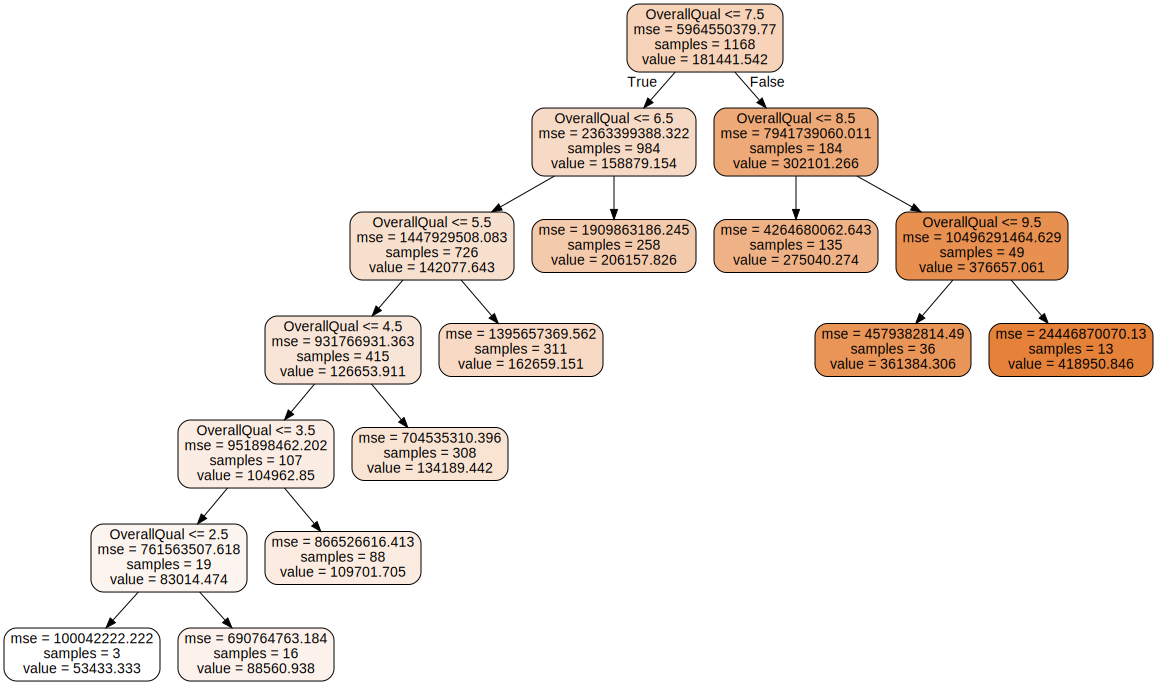

In [365]:
tree = DecisionTreeRegressor(max_depth=6)
tree.fit(baseline_train_X, baseline_train_y)

baseline_train_pred = tree.predict(baseline_train_X)
baseline_test_pred = tree.predict(baseline_test_X)

print('R Squared Train Score:', tree.score(baseline_train_X, baseline_train_y))
print('R Squared Test Score:', tree.score(baseline_test_X, baseline_test_y))

print('RMSE Train Score:', np.sqrt(mean_squared_error(baseline_train_y, baseline_train_pred)))
print('RMSE Test Score:', np.sqrt(mean_squared_error(baseline_test_y, baseline_test_pred)))

display(viztree(tree, feature_names=['OverallQual']))

### Test With Multiple Features

In [366]:
multiple = df.copy()
multiple.shape

(1460, 81)

In [367]:
multiple_train, multiple_test = train_test_split(df, test_size = 0.2, random_state = 42)
multiple_train.shape, multiple_test.shape

((1168, 81), (292, 81))

In [368]:
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath']
target = ['SalePrice']

multiple_train_X = multiple_train[features]
multiple_train_y = multiple_train[target]

multiple_test_X = multiple_test[features]
multiple_test_y = multiple_test[target]

R Squared Train Score: 0.9141524111012648
R Squared Test Score: 0.849027874664654
RMSE Train Score: 22628.350999759863
RMSE Test Score: 34029.47912493584


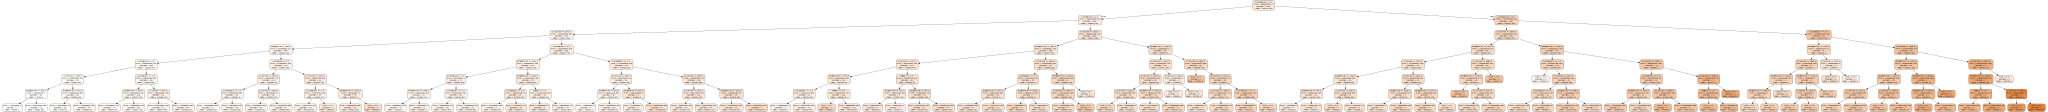

In [369]:
tree = DecisionTreeRegressor(max_depth=7)
tree.fit(multiple_train_X, multiple_train_y)

multiple_train_pred = tree.predict(multiple_train_X)
multiple_test_pred = tree.predict(multiple_test_X)

print('R Squared Train Score:', tree.score(multiple_train_X, multiple_train_y))
print('R Squared Test Score:', tree.score(multiple_test_X, multiple_test_y))

print('RMSE Train Score:', np.sqrt(mean_squared_error(multiple_train_y, multiple_train_pred)))
print('RMSE Test Score:', np.sqrt(mean_squared_error(multiple_test_y, multiple_test_pred)))

display(viztree(tree, feature_names=features))

### With Polynomial Features

In [370]:
poly = df.copy()
poly.shape

(1460, 81)

Will Create Five Polynomial Features
- Cubed Overall Quality
- Cubed GrLivArea
- Cubed GarageCars
- Frontage to LotArea Ratio (LotFrontage / LotArea
- House Age (2015 - YrBuilt)

In [371]:
poly['OverallQual**3'] = poly['OverallQual'] ** 3
poly['GrLivArea**3'] = poly['GrLivArea'] ** 3
poly['GarageCars**3'] = poly['GarageCars'] ** 3

In [372]:
poly['LotFrontage'] = poly['LotFrontage'].fillna(0)
poly['FrontageRatio'] = ( poly['LotFrontage'] / poly['LotArea'] ) * 100
poly['HouseAge'] = 2015 - poly['YearBuilt']

In [373]:
poly_train, poly_test = train_test_split(poly, test_size = 0.2, random_state = 42)
poly_train.shape, poly_test.shape

((1168, 86), (292, 86))

In [374]:
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath',
           'OverallQual**3', 'GrLivArea**3', 'GarageCars**3','FrontageRatio','HouseAge']
target = ['SalePrice']

poly_train_X = poly_train[features]
poly_train_y = poly_train[target]

poly_test_X = poly_test[features]
poly_test_y = poly_test[target]

R Squared Train Score: 0.9229125989461442
R Squared Test Score: 0.7691520724946899
RMSE Train Score: 21442.753723141446
RMSE Test Score: 42079.43569273255


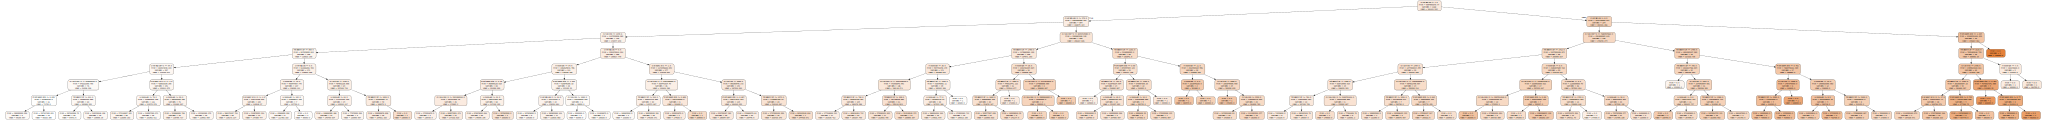

In [375]:
tree = DecisionTreeRegressor(max_depth=7)
tree.fit(poly_train_X, poly_train_y)

poly_train_pred = tree.predict(poly_train_X)
poly_test_pred = tree.predict(poly_test_X)

print('R Squared Train Score:', tree.score(poly_train_X, poly_train_y))
print('R Squared Test Score:', tree.score(poly_test_X, poly_test_y))

print('RMSE Train Score:', np.sqrt(mean_squared_error(poly_train_y, poly_train_pred)))
print('RMSE Test Score:', np.sqrt(mean_squared_error(poly_test_y, poly_test_pred)))

display(viztree(tree, feature_names=features))

### Testing Best Performing Features with Natural Log of Target

In [376]:
natural_log = df.copy()

In [377]:
natural_log['SalePrice'] = np.log(df['SalePrice'])

In [378]:
natural_log_train, natural_log_test = train_test_split(baseline, test_size = 0.2, random_state = 42)
natural_log_train.shape, natural_log_test.shape

((1168, 81), (292, 81))

In [379]:
features = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', ]
target = ['SalePrice']

natural_log_train_X = natural_log_train[features]
natural_log_train_y = natural_log_train[target]

natural_log_test_X = natural_log_test[features]
natural_log_test_y = natural_log_test[target]

R Squared Train Score: 0.9141524111012648
R Squared Test Score: 0.8513932802302404
RMSE Train Score: 22628.350999759863
RMSE Test Score: 33761.84262172461


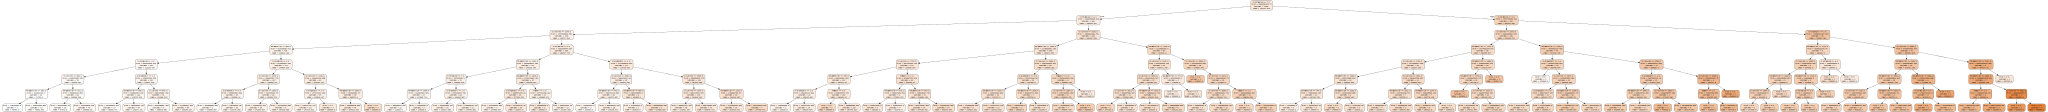

In [380]:
tree = DecisionTreeRegressor(max_depth=7)
tree.fit(natural_log_train_X, natural_log_train_y)

natural_log_train_pred = tree.predict(natural_log_train_X)
natural_log_test_pred = tree.predict(natural_log_test_X)

print('R Squared Train Score:', tree.score(natural_log_train_X, natural_log_train_y))
print('R Squared Test Score:', tree.score(natural_log_test_X, natural_log_test_y))

print('RMSE Train Score:', np.sqrt(mean_squared_error(natural_log_train_y, natural_log_train_pred)))
print('RMSE Test Score:', np.sqrt(mean_squared_error(natural_log_test_y, natural_log_test_pred)))

display(viztree(tree, feature_names=features))

## Kitchen Soup Tree

- Convert Categorical variables to one hot encoded
- Fill missing values throughout
- Add additional numeric features

In [381]:
sink = df.copy()

In [382]:
sink = pd.get_dummies(sink, dummy_na=False)

In [383]:
missing = sink.isnull().sum()
pd.Series(missing, missing.index).nlargest(5)

LotFrontage    259
GarageYrBlt     81
MasVnrArea       8
Id               0
MSSubClass       0
dtype: int64

In [384]:
sink['LotFrontage'] = sink['LotFrontage'].fillna(0)

In [385]:
sink['OverallQual**3'] = sink['OverallQual'] ** 3
sink['GrLivArea**3'] = sink['GrLivArea'] ** 3
sink['GarageCars**3'] = sink['GarageCars'] ** 3
sink['FrontageRatio'] = ( sink['LotFrontage'] / sink['LotArea'] ) * 100
sink['HouseAge'] = 2015 - sink['YearBuilt']

In [386]:
sink['GarageYrBlt'] = sink['GarageYrBlt'].fillna( sink['GarageYrBlt'].mean() ) 

In [387]:
sink = sink.replace([np.inf, -np.inf], 0)

In [388]:
sink.columns.to_series().groupby(sink.dtypes).groups

{dtype('int64'): Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        ...
        'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
        'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
        'SaleCondition_Partial', 'OverallQual**3', 'GrLivArea**3',
        'GarageCars**3', 'HouseAge'],
       dtype='object', length=291),
 dtype('float64'): Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt', 'FrontageRatio'], dtype='object')}

In [389]:
sink['MasVnrArea'] = sink['MasVnrArea'].fillna(0)

In [390]:
sink_train, sink_test = train_test_split(sink, test_size = 0.2, random_state = 42)

In [391]:
sink_y_train = sink_train['SalePrice']
sink_X_train = sink_train.drop(columns=['Id', 'SalePrice'], axis=1)

sink_y_test = sink_test['SalePrice']
sink_X_test = sink_test.drop(columns=['Id', 'SalePrice'], axis=1)

In [392]:
tree = DecisionTreeRegressor(max_depth=8)
tree.fit(sink_X_train, sink_y_train)

sink_train_pred = tree.predict(sink_X_train)
sink_test_pred = tree.predict(sink_X_test)

print('R Squared Train Score:', tree.score(sink_X_train, sink_y_train))
print('R Squared Test Score:', tree.score(sink_X_test, sink_y_test))

print('RMSE Train Score:', np.sqrt(mean_squared_error(sink_train_pred, sink_y_train)))
print('RMSE Test Score:', np.sqrt(mean_squared_error(sink_test_pred, sink_y_test)))

R Squared Train Score: 0.9665104488839025
R Squared Test Score: 0.7363902744847908
RMSE Train Score: 14133.29808741976
RMSE Test Score: 44966.34948590684


# Summary of RSME Across Approaches

In [393]:
print('Summary of RSME Performance for Different Feature \nSelection Methods for DecisionTreeRegressor:')
print('Single Feature RMSE Test Score:', np.sqrt(mean_squared_error(baseline_test_y, baseline_test_pred)))
print('Multiple Features RMSE Test Score:', np.sqrt(mean_squared_error(multiple_test_y, multiple_test_pred)))
print('Polynomial Features Test Score:', np.sqrt(mean_squared_error(poly_test_y, poly_test_pred)))
print('Natural Log of Target RMSE Test Score:', np.sqrt(mean_squared_error(natural_log_test_y, natural_log_test_pred)))
print('Kitchen Sink RMSE Test Score:', np.sqrt(mean_squared_error(sink_test_pred, sink_y_test)))

Summary of RSME Performance for Different Feature 
Selection Methods for DecisionTreeRegressor:
Single Feature RMSE Test Score: 46390.91975269269
Multiple Features RMSE Test Score: 34029.47912493584
Polynomial Features Test Score: 42079.43569273255
Natural Log of Target RMSE Test Score: 33761.84262172461
Kitchen Sink RMSE Test Score: 44966.34948590684


In [403]:
def tree_classifier(X, y): 
    # Split into test and train data
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=42)

    # Fit model using train data
    model = DecisionTreeRegressor()
    model.fit(X_train, y_train)
    
    # Make Predictions using test features
    y_pred = model.predict(X_test)
    
    # Compare predictions to test target
    rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
    r2 = tree.score(X_test, y_pred)
    
    # How of the relationship is explained by the model
    print('R^2:', r2)
    # How off is the model per prediction? 
    print('RMSE:', rmse)

In [404]:
X = sink.drop(columns=['Id', 'SalePrice'], axis=1)
y = sink['SalePrice']

tree_classifier(X,y)

R^2: 0.9414150728472287
RMSE: 44057.43005791667


## Part 2 / Stretch: "Play Tennis" Classification

We'll reproduce the "Play Tennis" example from Ross Quinlan's 1986 paper, [Induction of Decison Trees](https://link.springer.com/content/pdf/10.1007%2FBF00116251.pdf).

[According to Wikipedia](https://en.wikipedia.org/wiki/Ross_Quinlan), "John Ross Quinlan is a computer science researcher in data mining and decision theory. He has contributed extensively to the development of decision tree algorithms, including inventing the canonical C4.5 and ID3 algorithms."

#### "Table 1 shows a small training set"

In [348]:
import pandas as pd

columns = 'No. Outlook Temperature Humidity Windy PlayTennis'.split()

raw = """1 sunny hot high false N
2 sunny hot high true N
3 overcast hot high false P
4 rain mild high false P
5 rain cool normal false P
6 rain cool normal true N
7 overcast cool normal true P
8 sunny mild high false N
9 sunny cool normal false P
10 rain mild normal false P
11 sunny mild normal true P
12 overcast mild high true P
13 overcast hot normal false P
14 rain mild high true N"""

data = [row.split() for row in raw.split('\n')]
tennis = pd.DataFrame(data=data, columns=columns).set_index('No.')
tennis['PlayTennis'] = (tennis['PlayTennis'] == 'P').astype(int)

tennis

,Outlook,Temperature,Humidity,Windy,PlayTennis
No.,,,,,
1,sunny,hot,high,false,0
2,sunny,hot,high,true,0
3,overcast,hot,high,false,1
4,rain,mild,high,false,1
5,rain,cool,normal,false,1
6,rain,cool,normal,true,0
7,overcast,cool,normal,true,1
8,sunny,mild,high,false,0
9,sunny,cool,normal,false,1


#### "A decision tree that correctly classifies each object in the training set is given in Figure 2."

<img src="https://i.imgur.com/RD7d0u0.png" height="300">

In this dataset, the tennis player decided to play on 64% of the days, and decided not to on 36% of the days.

In [349]:
tennis['PlayTennis'].value_counts(normalize=True) * 100

1    64.285714
0    35.714286
Name: PlayTennis, dtype: float64

The tennis player played on 100% of the overcast days, 40% of the sunny days, and 60% of the  rainy days

In [350]:
tennis.groupby('Outlook')['PlayTennis'].mean() * 100

Outlook
overcast    100.0
rain         60.0
sunny        40.0
Name: PlayTennis, dtype: float64

On sunny days, the tennis player's decision depends on the humidity. (The Outlook and Humidity features interact.)

In [351]:
sunny = tennis[tennis['Outlook']=='sunny']
sunny.groupby('Humidity')['PlayTennis'].mean() * 100

Humidity
high        0
normal    100
Name: PlayTennis, dtype: int64

On rainy days, the tennis player's decision depends on the wind. (The Outlook and Windy features interact.)

In [352]:
rainy = tennis[tennis['Outlook']=='rain']
rainy.groupby('Windy')['PlayTennis'].mean() * 100

Windy
false    100
true       0
Name: PlayTennis, dtype: int64

#### Before modeling, we will ["encode" categorical variables, using pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html?highlight=get_dummies#computing-indicator-dummy-variables)

In [353]:
y = tennis['PlayTennis']
X = pd.get_dummies(tennis.drop(columns='PlayTennis'))
X

,Outlook_overcast,Outlook_rain,Outlook_sunny,Temperature_cool,Temperature_hot,Temperature_mild,Humidity_high,Humidity_normal,Windy_false,Windy_true
No.,,,,,,,,,,
1,0,0,1,0,1,0,1,0,1,0
2,0,0,1,0,1,0,1,0,0,1
3,1,0,0,0,1,0,1,0,1,0
4,0,1,0,0,0,1,1,0,1,0
5,0,1,0,1,0,0,0,1,1,0
6,0,1,0,1,0,0,0,1,0,1
7,1,0,0,1,0,0,0,1,0,1
8,0,0,1,0,0,1,1,0,1,0
9,0,0,1,1,0,0,0,1,1,0


## Train a Decision Tree Classifier
Get a score of 100% (accuracy)

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [354]:
tree = DecisionTreeClassifier(max_depth=4)
tree.fit(X, y)
print('R^2', tree.score(X, y))

R^2 1.0


## Compare to Logistic Regression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [355]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score

In [356]:
model = LogisticRegression(solver='lbfgs')
model.fit(X, y)
y_pred = model.predict(X)
print('R^2', r2_score(y, y_pred))

R^2 0.37777777777777777


## Visualize the tree
https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

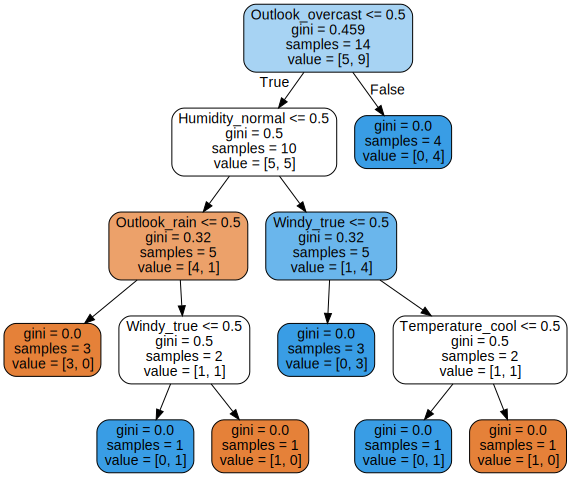

In [357]:
display(viztree(tree, feature_names=X.columns))